Aaliyah John-Harry and Gillian McGovern

Abstract:

This study examines how academic performance (University GPA), hands-on experience (internships and projects completed), professional accreditations (certifications), and field of study influence early-career success - measured by starting salary, career satisfaction, and time to first promotion among STEM graduates over age 22. Using the Education & Career Success dataset from Kaggle containing 5,000 observations, we filtered to those in Engineering, Computer Science, or Medicine who were older than 22.

Firstly, we performed exploratory data analysis using histograms, boxplots, scatterplots, and correlation matrices to understand each predictor’s raw relationship with outcomes. We engineered new features (GPA bands, total experience, internships per year of age) and confirmed that none of our numeric predictors showed strong linear trends with satisfaction or promotion timing.

We then fitted multiple regression models (such as Ridge and Lasso) on starting salary, career satisfaction, and years to promotion to isolate each predictor’s impact on starting salary while holding all other factors constant. Across these continuous-outcome models, R² values remained low (<0.05), indicating that linear combinations of GPA, internships, projects, and certifications explain little variance in outcomes. Even with ordinal data, logistic regression models performed poorly.
Finally, reframing starting salary as a binary high/low class, we trained and tuned classification models (K-Nearest Neighbors, decision trees, random forests, and logistic regression). Logistic regression performed best, achieving approximately 52% accuracy in distinguishing above- versus below-median salaries which suggests modest predictive power from these educational factors.

Overall, while academic and experiential credentials show some association with early-career pay, their standalone predictive value is limited. This highlights the need to integrate additional variables (like networking, soft skills, employer characteristics) for a more complete model of career success.


Introduction:
1.	Research Question
*   How do academic performance (University GPA), practical experience (number of internships and projects completed), and professional accreditations (number of certifications) influence early-career outcomes - specifically starting salary, career satisfaction, and advancement in various STEM fields for people over 22?

2.	Justification
*   The research question combines our academic experiences as MS Data Science students with our professional experiences by examining how investments in our education directly relate to real-world career benefits.

3.	Dataset
  
*   Education & Career Success dataset is from [Kaggle](https://www.kaggle.com/datasets/adilshamim8/education-and-career-success/data)
*   This dataset contains 5,000 observations of students' educational backgrounds, skills, and career outcomes.


# EDA

Data exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, PredictionErrorDisplay
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Load the dataset
url = 'https://raw.githubusercontent.com/aaliyahmjh/DATA602/refs/heads/main/education_career_success.csv'
edu_car = pd.read_csv(url)

# Check the first few rows of the dataset
edu_car

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


In [ ]:
# Print shape, info, and summary stats
print("Dataset shape:", edu_car.shape)
print(edu_car.info())
print(edu_car.describe())

Dataset shape: (5000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 no

`info()` shows us that this dataset has 5,000 observations (rows) where each row represent a student. Additionally, there are 20 variables in this dataset. Most of the variables are numerical, and a few are qualitative. Out of the outcome variables from our research question, the only one that is continuous data `Starting_Salary`. The other ones are discrete or ordinal data.

Additionally, we can see there are no missing values in this dataframe.

`describe()` gives us the mean, std, min, the quartiles and the max for each numerical variable.

In [ ]:
# Check first 5 rows
edu_car.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


We now have a rough idea of the data we're looking at.

# Data Wrangling

Tidying of your data, manipulating missing values, structuring of
your data, etc.

Let's first filter the data to students over 22 years old in STEM, and only look at the variables related to our research question:

---



In [ ]:
# Check the values for Field of Study
print(edu_car["Field_of_Study"].unique())

['Arts' 'Law' 'Medicine' 'Computer Science' 'Engineering' 'Business'
 'Mathematics']


We can see that Medicine, Computer Science, and Engineering are the only STEM related fields so let's filter for those values:

In [ ]:
# Filter the data

# Keep only STEM fields and age > 22
stem = ['Engineering', 'Computer Science', 'Medicine']
edu_car = edu_car[(edu_car['Age'] > 22) & (edu_car['Field_of_Study'].isin(stem))]

# Only keep relevant data
edu_car = edu_car.dropna(subset=[
    'Age','University_GPA','Internships_Completed','Certifications',
    'Field_of_Study','Starting_Salary',
    'Career_Satisfaction','Years_to_Promotion'
])

Now let's create some new variables that would be useful for our research such as GPA Level and Total Experience:

In [ ]:
# Add new features

# Three bins for GPA: low (<3.0), mid (3.0–3.5), high (>3.5)
edu_car['GPA_Level'] = pd.cut(
    edu_car['University_GPA'],
    bins=[0,3.0,3.5,4.0],
    labels=['Low','Medium','High']
)
# Total hands-on experience
edu_car['Total_Experience'] = edu_car['Internships_Completed'] + edu_car['Projects_Completed']

# Internships per year of age
edu_car['Internships_per_Age'] = edu_car['Internships_Completed'] / edu_car['Age']

print(edu_car.info())
print(edu_car.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 2 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Student_ID             1207 non-null   object  
 1   Age                    1207 non-null   int64   
 2   Gender                 1207 non-null   object  
 3   High_School_GPA        1207 non-null   float64 
 4   SAT_Score              1207 non-null   int64   
 5   University_Ranking     1207 non-null   int64   
 6   University_GPA         1207 non-null   float64 
 7   Field_of_Study         1207 non-null   object  
 8   Internships_Completed  1207 non-null   int64   
 9   Projects_Completed     1207 non-null   int64   
 10  Certifications         1207 non-null   int64   
 11  Soft_Skills_Score      1207 non-null   int64   
 12  Networking_Score       1207 non-null   int64   
 13  Job_Offers             1207 non-null   int64   
 14  Starting_Salary        1207 non-null   float6

Our filtered dataset now contains 1,207 observations with 23 variables.

We know from our data exploration and the above output we don't have to deal with any missing values.

We now have a working, tidy dataframe to perform some statistical analysis.

# EDA

Well-labeled graphs/plots that are appropriate to your analysis. Each
visualization includes a description of what is being shown.

### Distributions

Let's take a look at the distributions of our predictor variables:

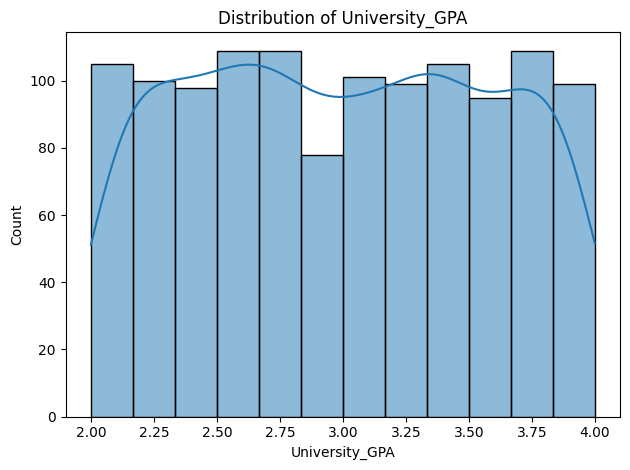

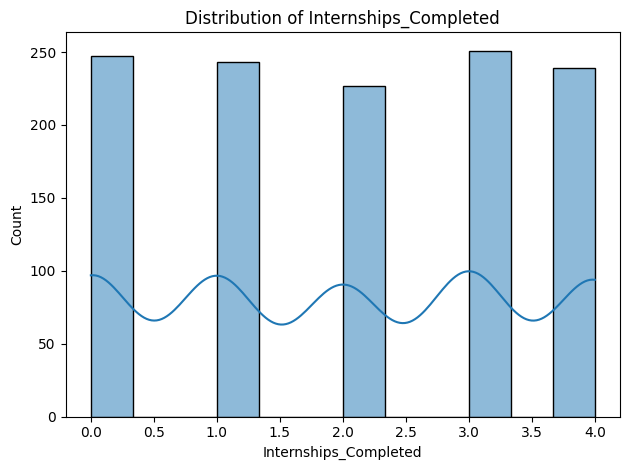

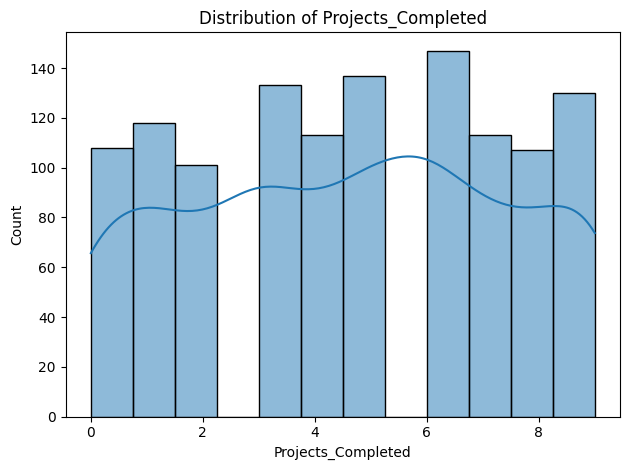

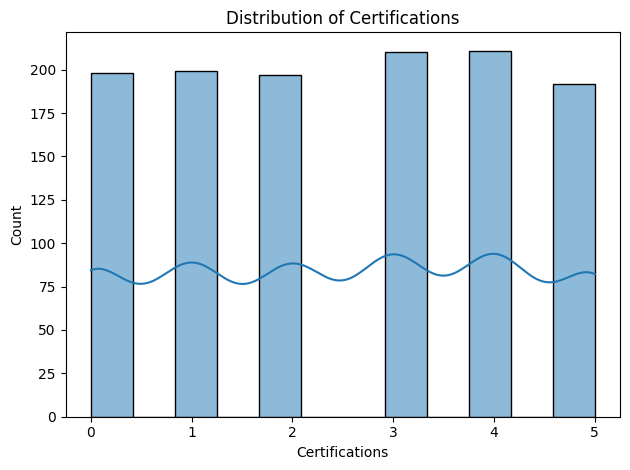

In [ ]:
# Distributions of our predictors
for col in ['University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications']:
    plt.figure()
    sns.histplot(edu_car[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

`University_GPA`:

*   Distribution looks uniform
*   Spreads from 2.0 - 4.0
*   No outliers

`Internships_Completed`:

*   Distribution looks uniform
*   Spreads from 0 - 4.0
*   No outliers

`Projects_Completed`:

*   Distribution looks uniform
*   Spreads from 0 - 4.0
*   No outliers

`Certifications`:

*   Distribution looks uniform
*   Spreads from 0 - 5
*   No outliers

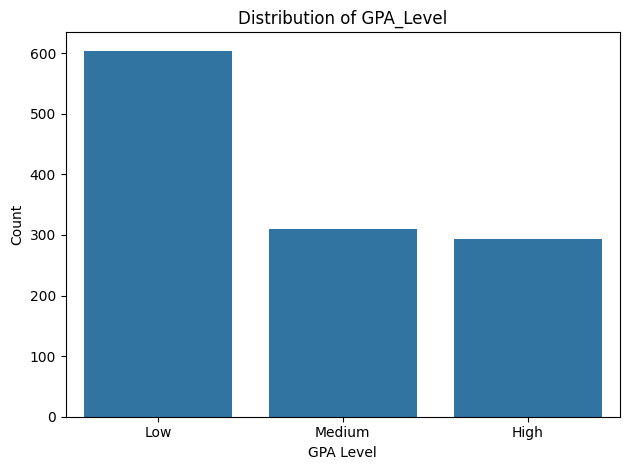

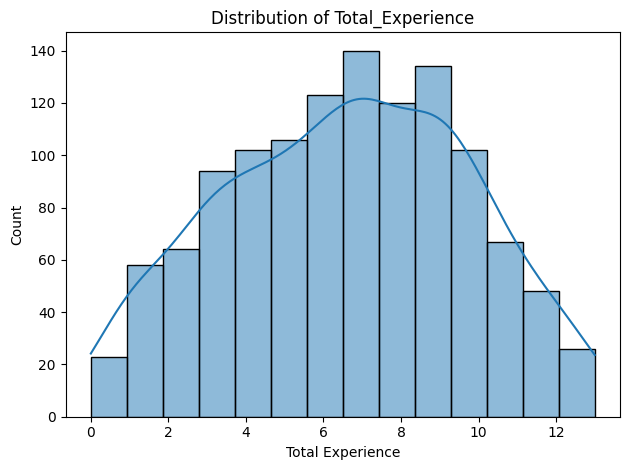

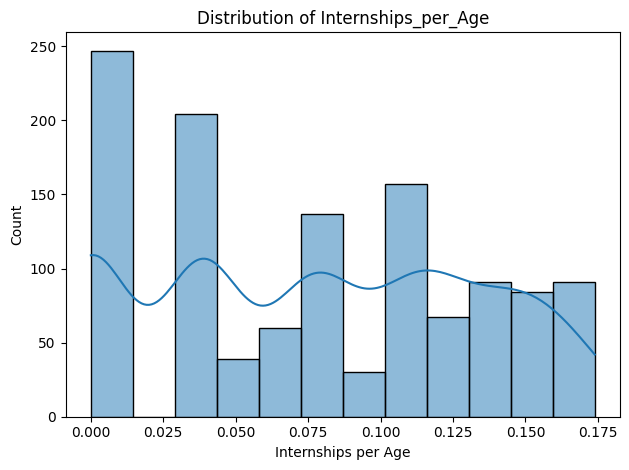

In [ ]:
# Distributions of our new variables

for col in ['GPA_Level','Total_Experience','Internships_per_Age']:
    plt.figure()
    if col == 'GPA_Level':
        sns.countplot(x=col, data=edu_car, order=['Low','Medium','High'])
    else:
        sns.histplot(edu_car[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.replace('_',' '))
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


`Distribution of GPA_Level` shows us that the most frequent GPA Level is Low followed by Medium, then High.

`Distribution of Total_Experience` shows us a roughly normal distribution, with the data being slightly left skewed. The mean is ~7 internships and projects completed. The spread is 0 - 12.

`Distribution of Internships_per_Age` shows us that most students do not have any internship experience. This distribution is right skewed. The spread is 0 - 0.175.

### Numerical Predictors vs. Outcomes

Let's take a look at the relationship between each predictor and our outcome variables:

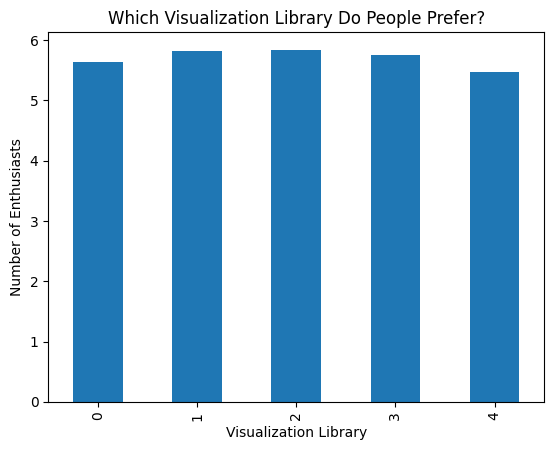

In [ ]:
# Vertical Bar Plot
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
edu_car.groupby('Internships_Completed')['Career_Satisfaction'].mean().plot.bar()
# plt.bar(x='Internships_Completed', height='Career_Satisfaction', data=edu_car.groupby('Internships_Completed')['Career_Satisfaction'].mean(), color='skyblue')
plt.xlabel('Visualization Library')
plt.ylabel('Number of Enthusiasts')
plt.title('Which Visualization Library Do People Prefer?')
plt.show()

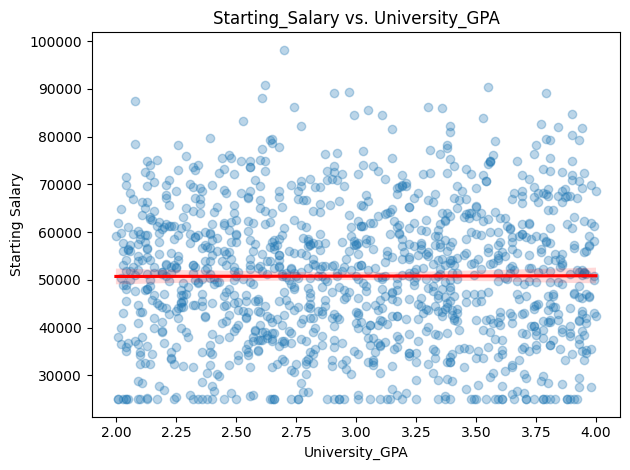

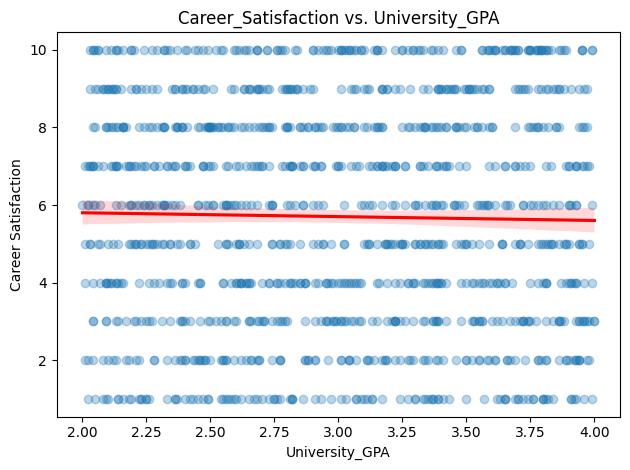

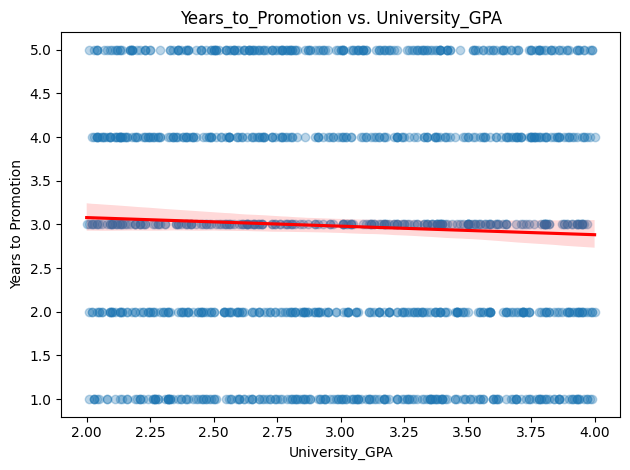

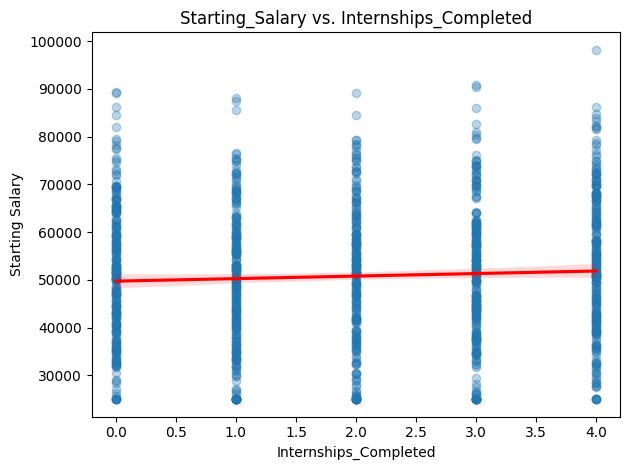

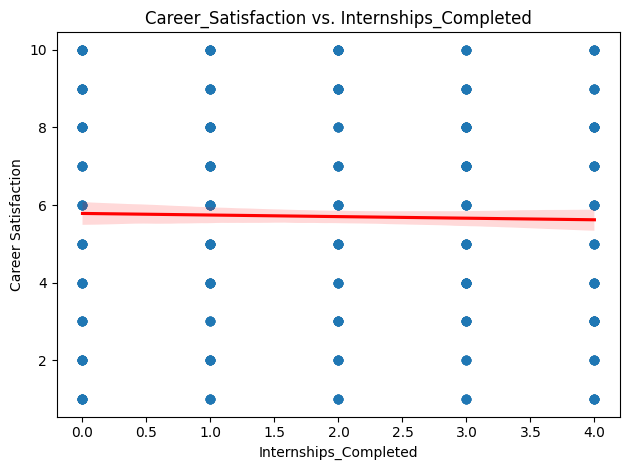

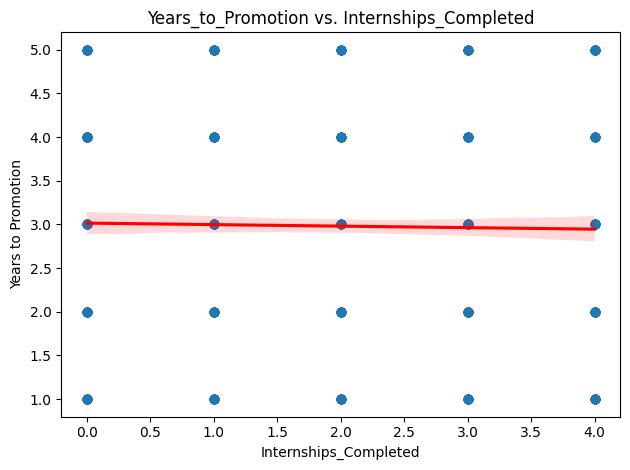

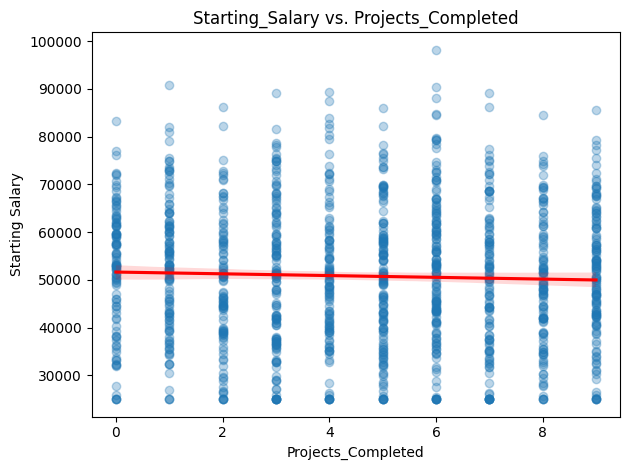

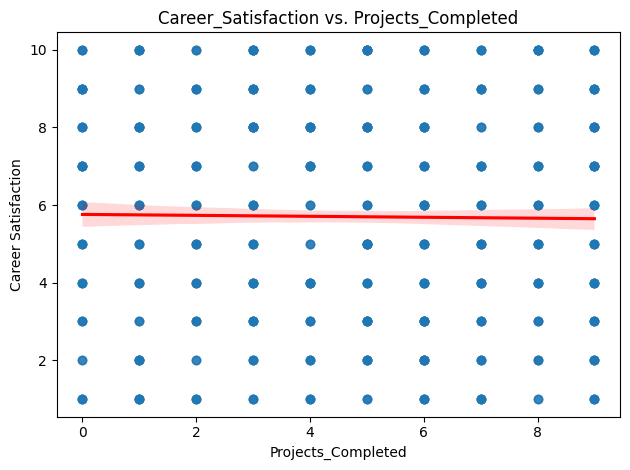

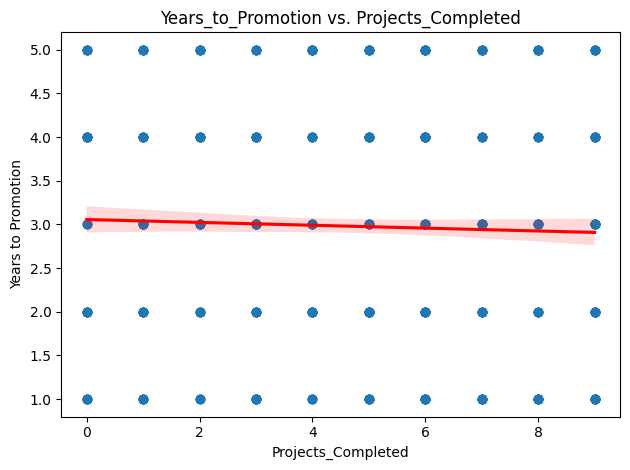

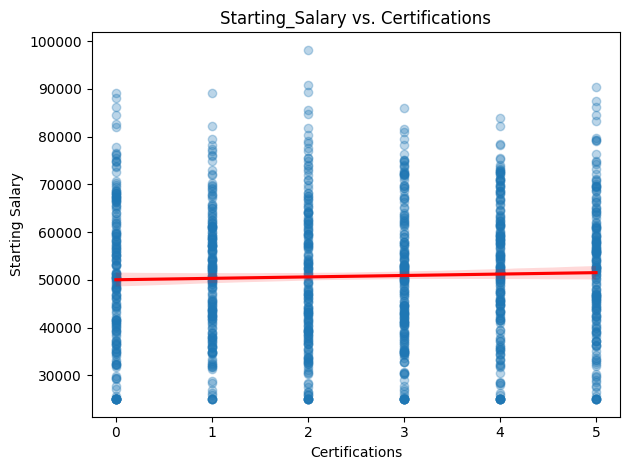

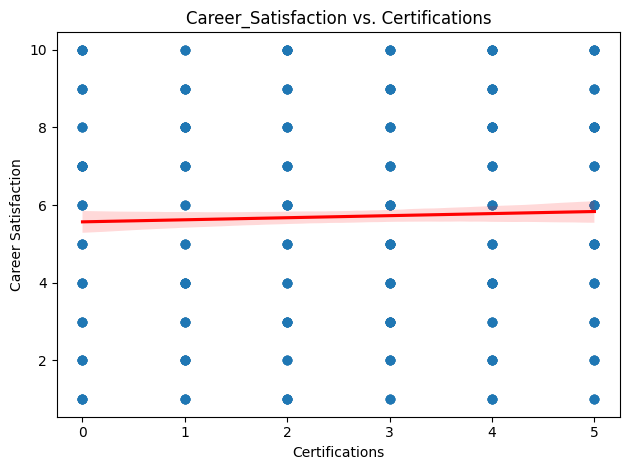

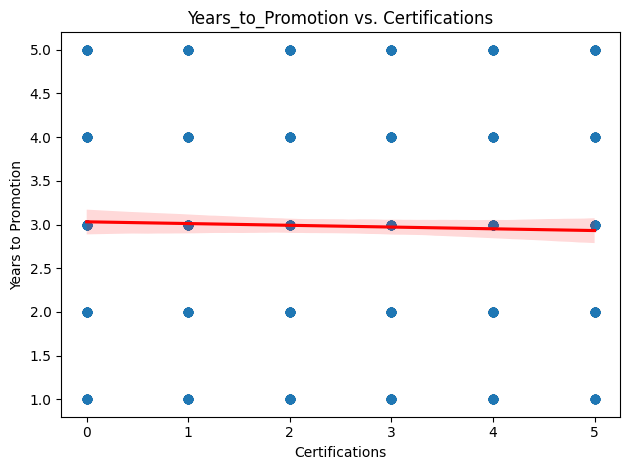

In [ ]:
# Numerical predictor vs. each outcome
numeric_preds = ['University_GPA', 'Internships_Completed', 'Projects_Completed', 'Certifications']
outcomes     = ['Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion']

for pred in numeric_preds:
    for outcome in outcomes:
        plt.figure()
        sns.regplot(x=pred, y=outcome, data=edu_car,
                    scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
        plt.title(f'{outcome} vs. {pred}')
        plt.xlabel(pred)
        plt.ylabel(outcome.replace('_',' '))
        plt.tight_layout()
        plt.show()

Most of the numerical predictors are discrete data and do not show a strong linear relationship.



Let's plot some bar graphs for the ordinal variables:

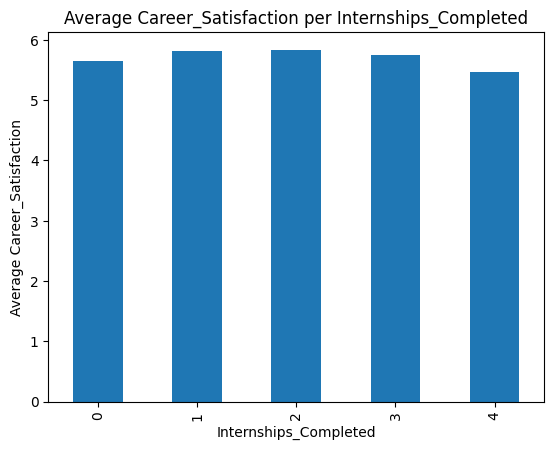

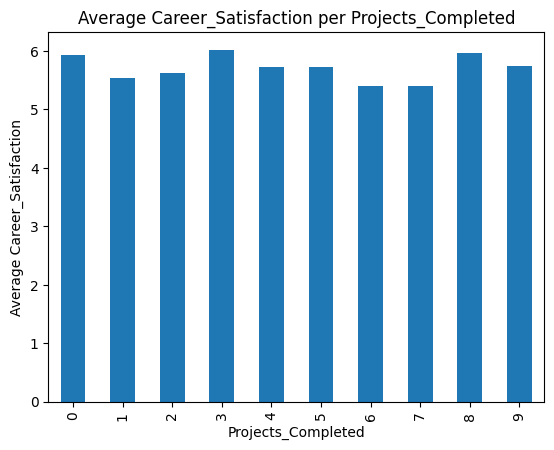

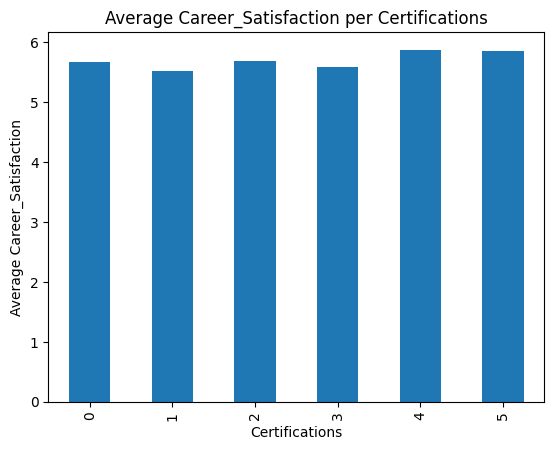

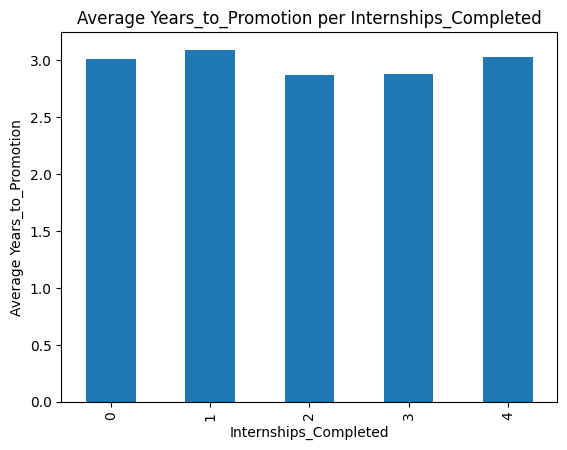

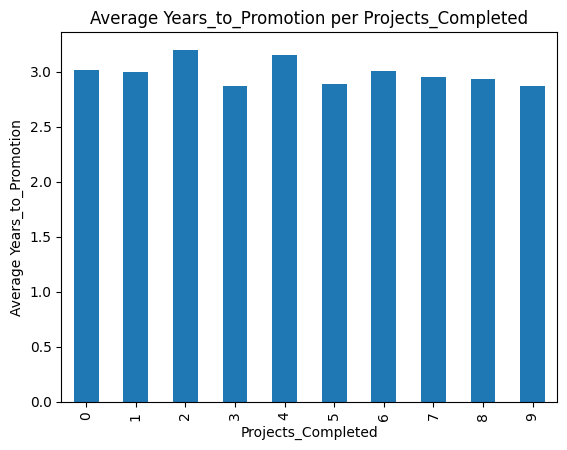

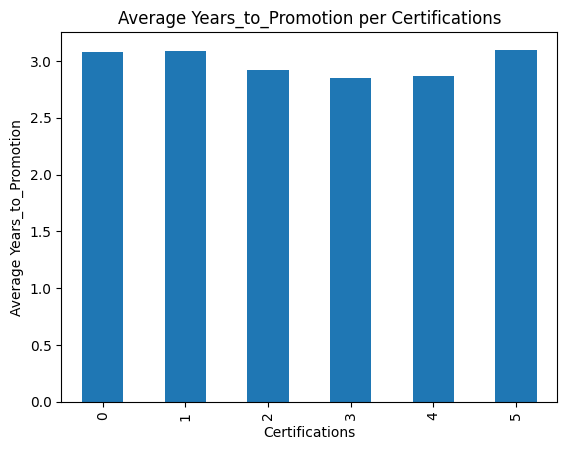

In [ ]:
# These variables have discrete values so we'll try bar plots focusing on averages of the target variables
outcomes = ['Career_Satisfaction','Years_to_Promotion']
numeric_preds_ordinal = ['Internships_Completed', 'Projects_Completed', 'Certifications']

for outcome in outcomes:
  for predictor in numeric_preds_ordinal:
    edu_car.groupby(predictor)[outcome].mean().plot.bar()
    plt.xlabel(predictor)
    plt.ylabel(f'Average {outcome}')
    plt.title(f'Average {outcome} per {predictor}')
    plt.show()

All of the graphs remained pretty consistent, meaning the average target variable value did not change much with increasing predictor variable.

### Categorical Predictors vs. Outcomes

<ipython-input-12-afea611177b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


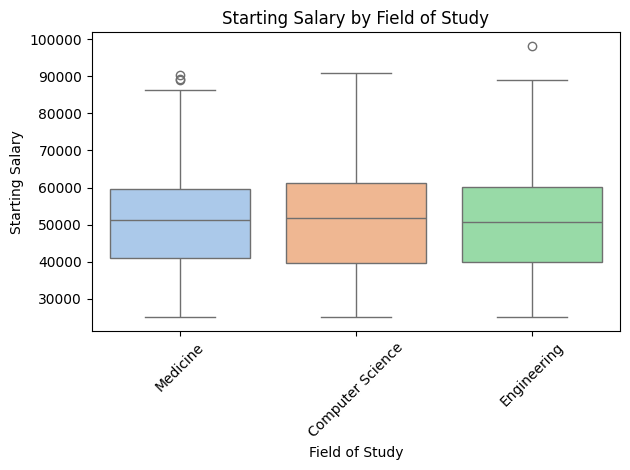

<ipython-input-12-afea611177b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


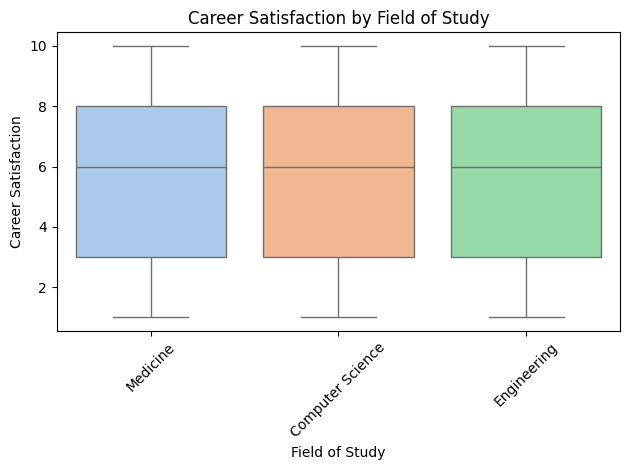

<ipython-input-12-afea611177b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


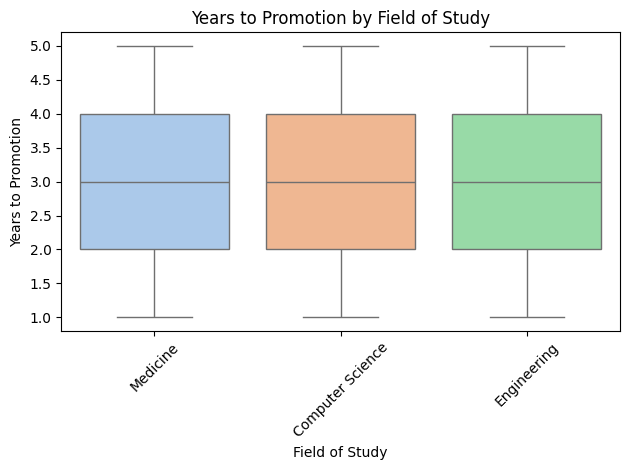

In [ ]:
# Categorical predictor vs. each outcome
categorical_preds = ['Field_of_Study']
outcomes          = ['Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion']

for cat in categorical_preds:
    for outcome in outcomes:
        plt.figure()
        sns.boxplot(
            x=cat,
            y=outcome,
            data=edu_car,
            palette='pastel'
        )
        plt.title(f'{outcome.replace("_"," ")} by {cat.replace("_"," ")}')
        plt.xlabel(cat.replace('_',' '))
        plt.ylabel(outcome.replace('_',' '))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


We can see from these box plots that the median value for each outcome variable is basically the same across each field of study.

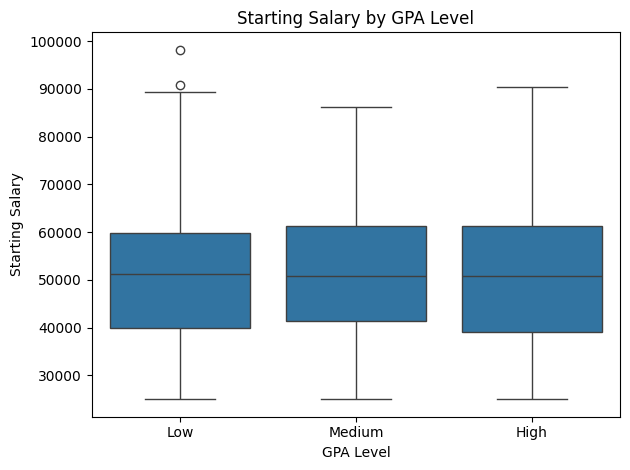

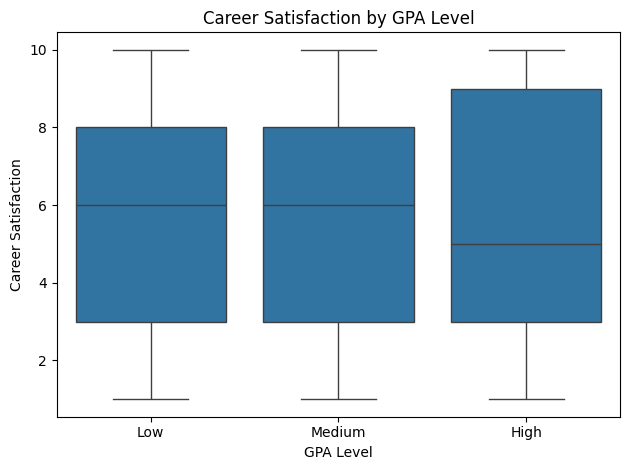

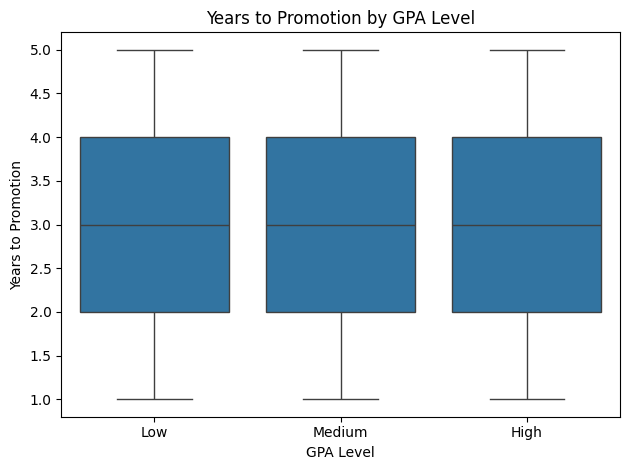

In [ ]:
# Career Satisfaction by GPA Level
for outcome in outcomes:
    plt.figure()
    sns.boxplot(x='GPA_Level', y=outcome, data=edu_car, order=['Low','Medium','High'])
    plt.title(f'{outcome.replace("_"," ")} by GPA Level')
    plt.xlabel('GPA Level')
    plt.ylabel(outcome.replace('_',' '))
    plt.tight_layout()
    plt.show()


We can see from these box plots that the median value for `Starting_Salary` and `Years_to_Promotion` is basically the same across each field of study. `Career_Satisfaction` has a lower median value for High GPA level which is interesting, but has a wider spread compared to Low and Medium.

### EDA for New Variables

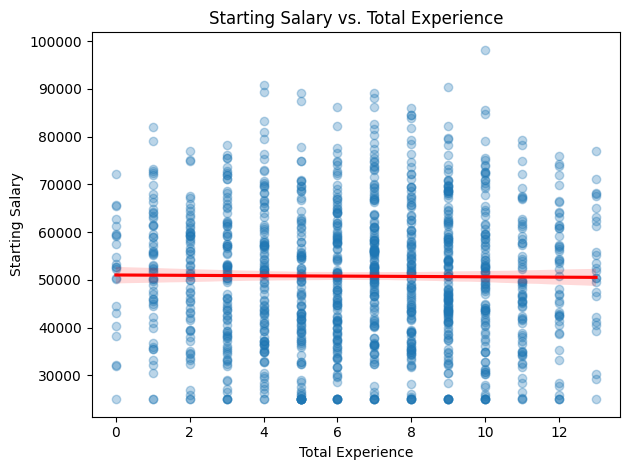

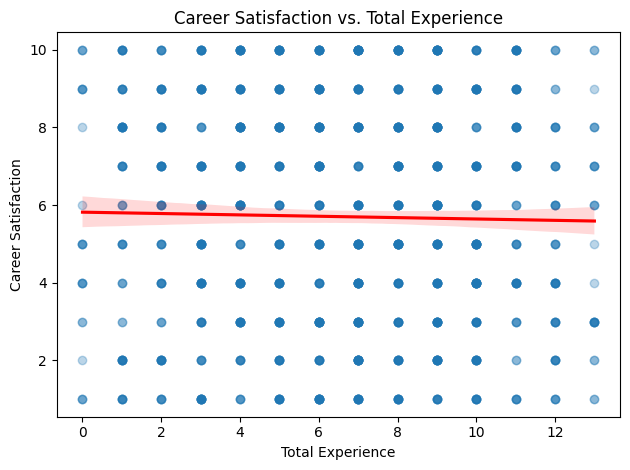

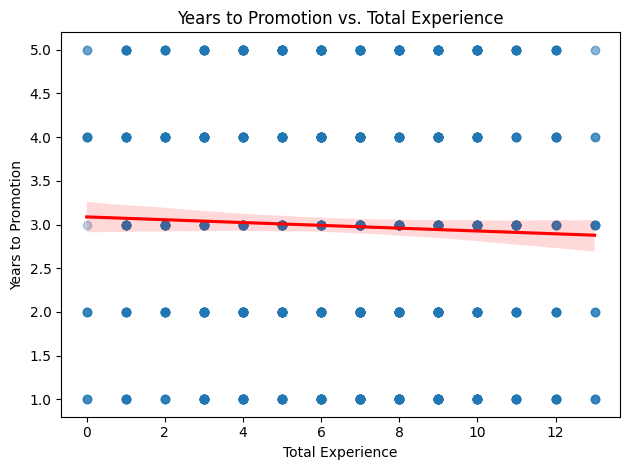

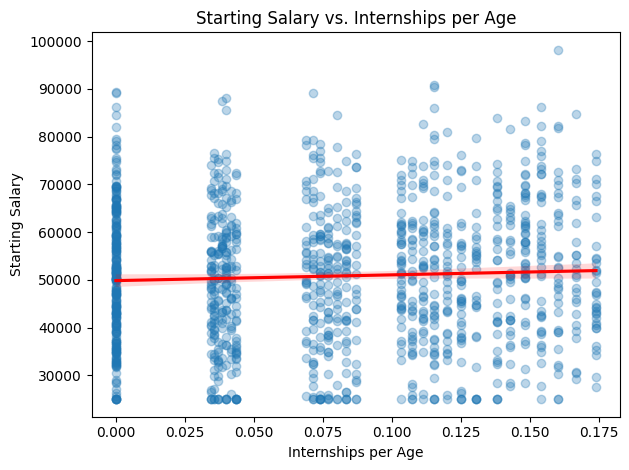

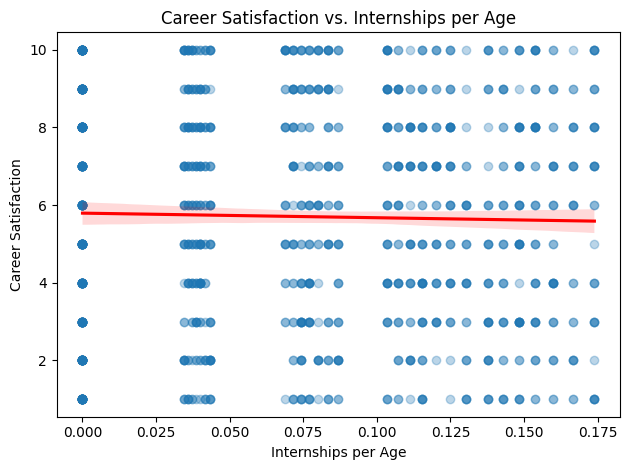

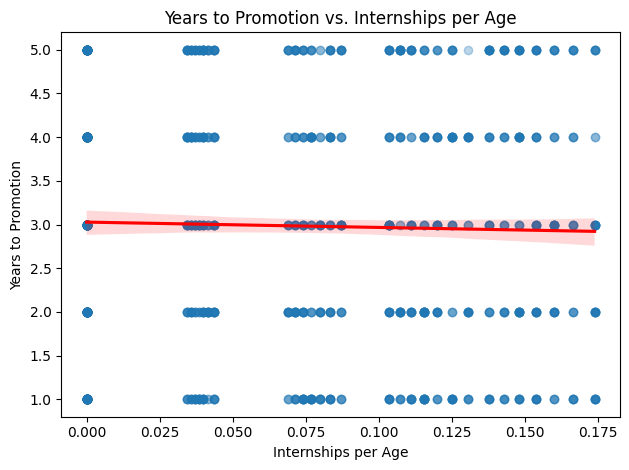

In [ ]:
# New variables vs outcome variables scatter plots
for pred in ['Total_Experience','Internships_per_Age']:
    for outcome in outcomes:
        plt.figure()
        sns.regplot(x=pred, y=outcome, data=edu_car,
                    scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
        plt.title(f'{outcome.replace("_"," ")} vs. {pred.replace("_"," ")}')
        plt.xlabel(pred.replace('_',' '))
        plt.ylabel(outcome.replace('_',' '))
        plt.tight_layout()
        plt.show()


Most of the numerical predictors are discrete data and do not show a strong linear relationship.

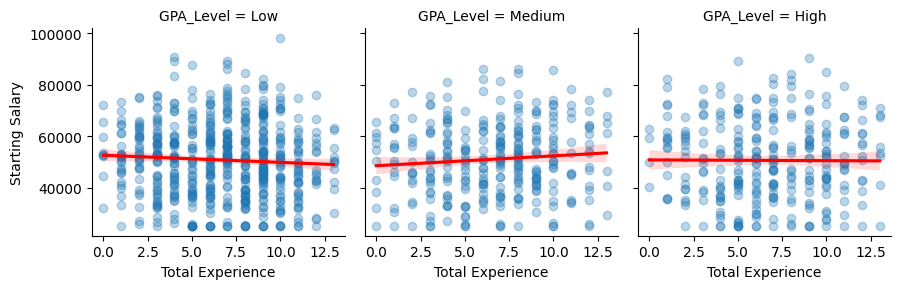

In [ ]:
# Total Experience vs Starting Salary for each GPA Level
g = sns.FacetGrid(edu_car, col='GPA_Level', col_order=['Low','Medium','High'])
g.map(sns.regplot, 'Total_Experience', 'Starting_Salary',
      scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
g.set_axis_labels('Total Experience','Starting Salary')
g.add_legend()
plt.tight_layout()
plt.show()


None of these graphs show a strong linear relationship. For Low GPA Level, the line shows a very slightly negative relationship, whereas for Medium it shows slightly positive, and High shows almost a straight line.

<ipython-input-16-172ab1feab4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-16-172ab1feab4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-16-172ab1feab4a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


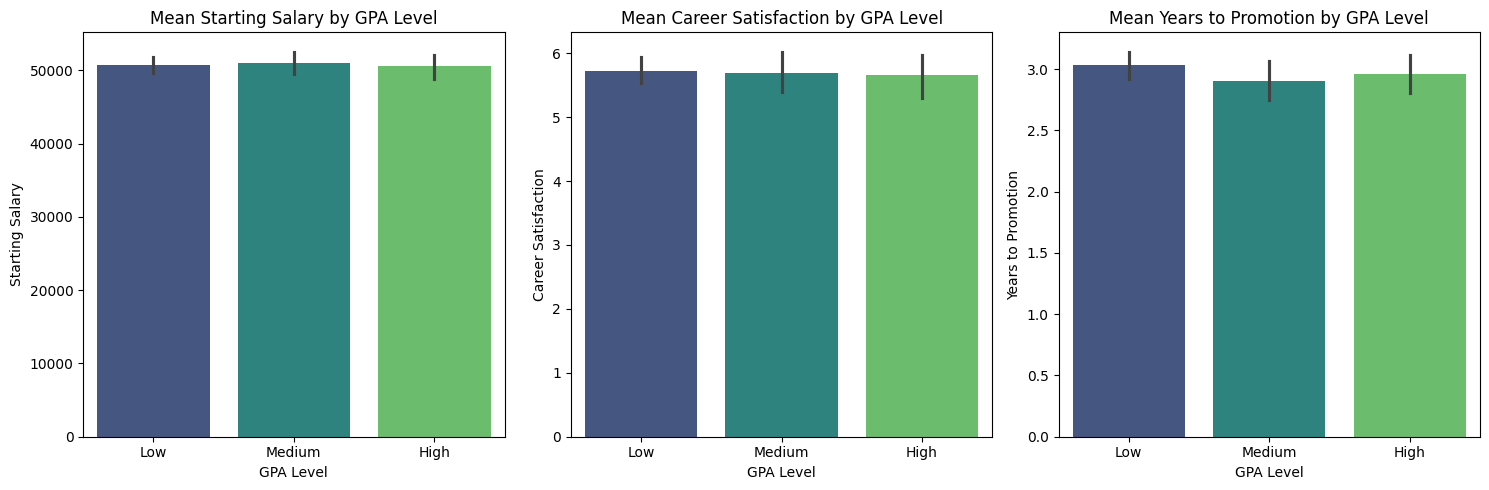

In [ ]:
# Average Starting Salary by GPA Level
outcomes = ['Starting_Salary','Career_Satisfaction','Years_to_Promotion']
order = ['Low','Medium','High']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, outcome in zip(axes, outcomes):
    sns.barplot(
        x='GPA_Level',
        y=outcome,
        data=edu_car,
        order=order,
        ax=ax,
        palette='viridis'
    )
    ax.set_title(f'Mean {outcome.replace("_"," ")} by GPA Level')
    ax.set_xlabel('GPA Level')
    ax.set_ylabel(outcome.replace('_',' '))
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Overall, the mean `Starting_Salary` and `Career_Satisfaction` look pretty uniform across all GPA levels. The mean `Years_to_Promotion` is slightly lower for a Medium and High GPA Level compared to Low.

### Multicollinearity Check

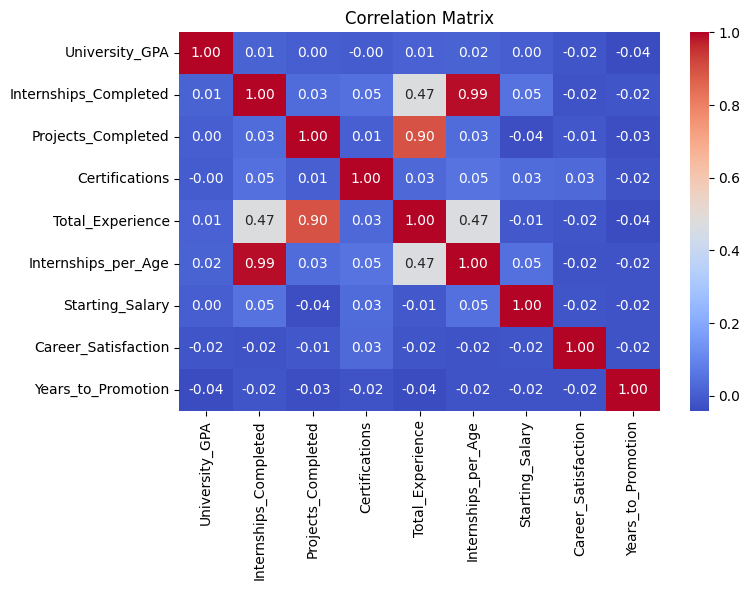

In [ ]:
# Check for multicollinearity
correlation_edu = edu_car[
    ['University_GPA','Internships_Completed','Projects_Completed',
     'Certifications','Total_Experience','Internships_per_Age',
     'Starting_Salary','Career_Satisfaction','Years_to_Promotion']
].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_edu, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The highly correlated variables are the new variables, and the variables used to make the new variables, so these correlations make sense. We do not need to remove any columns for multicolinearity. It looks like most of these variables are not highly correlated.

Now that we have a good visualization of our data, let's perform the analysis for our research question.

# Data Analysis

### Linear Regression Models

Let's look into the relationship between our predictor variables and `Starting_Salary` by creating some linear regression models:

In [ ]:
# Select the features for analysis
# Won't include Total_Experience or Internships_per_Age due to multicollinearity
features = [
    'University_GPA',
    'Internships_Completed',
    'Projects_Completed',
    'Certifications'
]
X_lr = edu_car[features].copy()
y_salary = edu_car['Starting_Salary']

Linear Regression:

In [ ]:
# Linear Regression for Starting Salary
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_salary, test_size=0.3, random_state=42
)

lr = LinearRegression().fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_test_lr)

rmse = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
print("Linear Regression Performance:")
print(f"  • RMSE: {rmse:.2f}")
print(f"  • R²:   {r2_score(y_test_lr, y_pred_lr):.3f}")
print("  • Coefficients:")
for feat, coef in zip(features, lr.coef_):
    print(f"     {feat}: {coef:.2f}")
print(f"  • Intercept: {lr.intercept_:.2f}")

Linear Regression Performance:
  • RMSE: 15026.87
  • R²:   -0.001
  • Coefficients:
     University_GPA: 626.11
     Internships_Completed: 255.96
     Projects_Completed: -243.41
     Certifications: 341.53
  • Intercept: 48447.60


We can see that the Rsqaured value for this model is very low, meaning this model does not cover the variance of `Starting_Salary`.

Let's try other linear regression models such as ridge and lasso:

In [ ]:
# Ridge Regression for Starting Salary
# Add in Total_Experience and Internships_per_Age since Ridge/Lasso handles multicollinearity
features = features + ['Total_Experience', 'Internships_per_Age']
X = edu_car[features].copy()
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_salary, test_size=0.3, random_state=42
)


# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

ridge = Ridge()

ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit to the training data
ridge_cv.fit(X_train_lr, y_train_lr)
print("Tuned ridge paramaters: {}".format(ridge_cv.best_params_))
print("Tuned ridge score: {}".format(ridge_cv.best_score_))

Tuned ridge paramaters: {'alpha': np.float64(1.0)}
Tuned ridge score: -0.010593159269570584


The ridge Rsquared looks very similar to the linear regression model. This means that variance is unaccounted for in this model, making it not a good model.

Let's try lasso, this time scaling our feature variables:

In [ ]:
# Lasso Regression for Starting Salary

# Scale features
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

# Set up the parameter grid
# To prevent `ConvergenceWarning: Objective did not converge`,
# which occurs for small values of alpha,
# for this model, start alpha at 0.1
param_grid = {"alpha": np.linspace(0.1, 1, 20)}

lasso = Lasso()

# Tuning
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

# Fit to the training data
lasso_cv.fit(X_train_lr_scaled, y_train_lr)
y_pred_lr = lasso_cv.predict(X_test_lr)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': np.float64(0.1)}
Tuned lasso score: -0.01059789601000385


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Even with scaling, the lasso Rsquared looks very similar to both ridge and the linear regression model. It looks like we can not recommend a linear model for this research. This data most likely requires a more complex model.

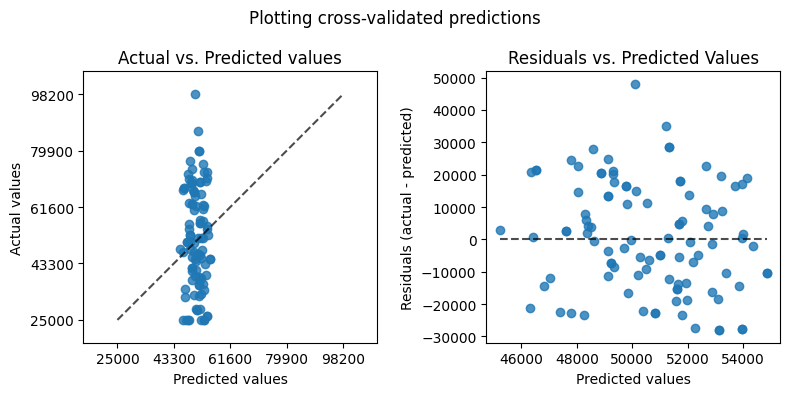

In [ ]:
# Residual Analysis

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test_lr,
    y_pred=y_pred_lr,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test_lr,
    y_pred=y_pred_lr,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

Although the Residuals plot does show constant variance as the points are random, the points do not hover around the 0 line. Additionaly, the Actual vs Predicted plot does not show a dignonal line. The points form a vertical line.

Looking at a QQ plot does not even seem necessary since this model breaks the linearity requirement of a valid and reliable linear regression model. A linear model can not represent the relationship between `Starting_Salary` and the predictor variables well.

Now let's take a look at the target variable, `Career_Satisfaction`:

Our EDA showed us that `Career_Satisfaction` does not have a strong linear relationship, but let's confirm this by trying out linear models. This time let's add in logistic regression since `Career_Satisfaction` is an ordinal numeric variable.

In [ ]:
# Select the features for analysis
# Won't include Total_Experience or Internships_per_Age due to multicollinearity
features = [
    'University_GPA',
    'Internships_Completed',
    'Projects_Completed',
    'Certifications'
]
X_v2 = edu_car[features].copy()
y_career_satisfaction = edu_car['Career_Satisfaction']

X_train_career_satisfaction, X_test_career_satisfaction, y_train_career_satisfaction, y_test_career_satisfaction = train_test_split(
    X_v2, y_career_satisfaction, test_size=0.3, random_state=42
)

<ipython-input-24-9c721e44ce63>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results_carrer_satisfaction, labels=models.keys())


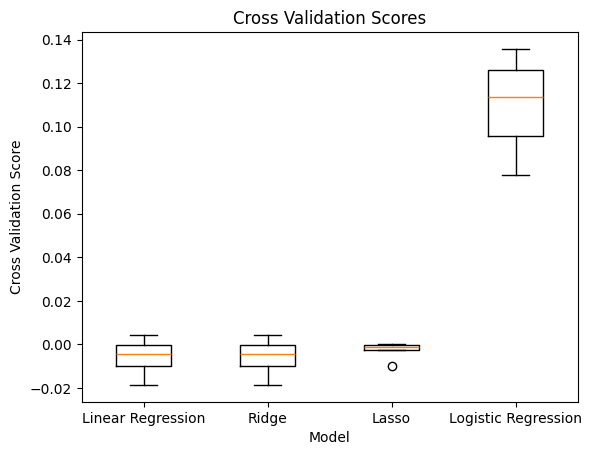

In [ ]:
# Try out linear regression models
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1), "Logistic Regression": LogisticRegression()}
results = []

# Scale features
scaler = StandardScaler()
X_train_career_satisfaction_scaled = scaler.fit_transform(X_train_career_satisfaction)
X_test_career_satisfaction_scaled = scaler.transform(X_test_career_satisfaction)

results_carrer_satisfaction = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_career_satisfaction_scaled, y_train_career_satisfaction, cv=kf)

  # Append the results
  results_carrer_satisfaction.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results_carrer_satisfaction, labels=models.keys())
plt.xlabel('Model')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Scores')
plt.show()

Similar to `Starting_Salary`, these models do not account for the variance of `Career_Satisfaction`. Logistic regression performed the best, which is expected, since a logistic regression model is used for an ordinal target variable.

Let's quick confirm via tuning that logistic regression is not a good linear model:

In [ ]:
# Create the parameter space
parameters = {"C": np.linspace(0.001, 1.0, 20)}

logreg = LogisticRegression()

# Instantiate the grid search object
logreg_cv = GridSearchCV(logreg, parameters)

# Fit the data to the model
logreg_cv.fit(X_train_career_satisfaction_scaled, y_train_career_satisfaction)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.001)}
Tuned Logistic Regression Best Accuracy Score: 0.12204142011834318


12% matches what we've seen in the above plot, so we can confirm a linear model is not a good fit. Overall, a linear model can not represent the relationship between `Career_Satisfaction` and the predictor variables well.

Now let's take a look at the target variable, `Years_to_Promotion`:

<ipython-input-26-2e8a7aa4a8e3>:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results_years_to_promotion, labels=models.keys())


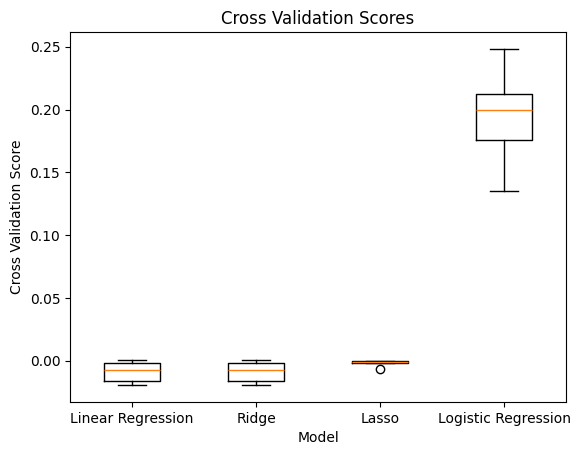

In [ ]:
# Try out linear regression models
y_years_promotion = edu_car['Years_to_Promotion']

X_train_years_promotion, X_test_years_promotion, y_train_years_promotion, y_test_years_promotion = train_test_split(
    X_v2, y_years_promotion, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_years_promotion_scaled = scaler.fit_transform(X_train_lr)
X_test_years_promotion_scaled = scaler.transform(X_test_lr)
results_years_to_promotion = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_years_promotion_scaled, y_train_years_promotion, cv=kf)

  # Append the results
  results_years_to_promotion.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results_years_to_promotion, labels=models.keys())
plt.xlabel('Model')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Scores')
plt.show()

These models also do not account for the variance of `Years_to_Promotion` well. Again, logistic regression performed the best which is expected.

Let's quick confirm via tuning that logistic regression is not a good linear model:

In [ ]:
# Create the parameter space
parameters = {"C": np.linspace(0.001, 1.0, 20)}

logreg = LogisticRegression()

# Instantiate the grid search object
logreg_cv = GridSearchCV(logreg, parameters)

# Fit the data to the model
logreg_cv.fit(X_train_years_promotion_scaled, y_train_years_promotion)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.001)}
Tuned Logistic Regression Best Accuracy Score: 0.22985347985347984


23% matches what we've seen in the above plot, so we can confirm a linear model is not a good fit. Overall, a linear model can not represent the relationship between `Years_to_Promotion` and the predictor variables well.

### Classification Model Selection

Now let's try a KNN Classification model for predicting a categorical salary variable. We'll create a new variable, `y_class`, which is 1 if the salary is above the median salary, otherwise 0.


KNN Classification (High vs. Low Salary):
              precision    recall  f1-score   support

         Low       0.48      0.48      0.48       187
        High       0.45      0.46      0.46       176

    accuracy                           0.47       363
   macro avg       0.47      0.47      0.47       363
weighted avg       0.47      0.47      0.47       363

Confusion Matrix:
 [[89 98]
 [95 81]]


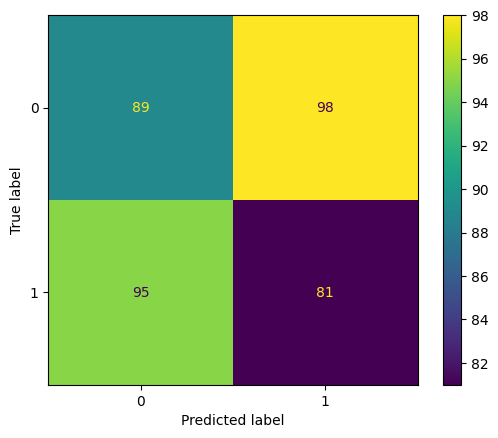

In [ ]:
# KNN Classification: High vs. Low Salary

# Create new target salary variable
median_salary = y_salary.median()
y_class = (y_salary > median_salary).astype(int)  # 1 = “High Salary”

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf, y_train_clf)

y_pred_clf = knn.predict(X_test_clf)
print("\nKNN Classification (High vs. Low Salary):")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Low','High']))
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

47% accuracy is alright, but not great. Let's see if we can improve this with cross validation and scaling.

Best k value: 38


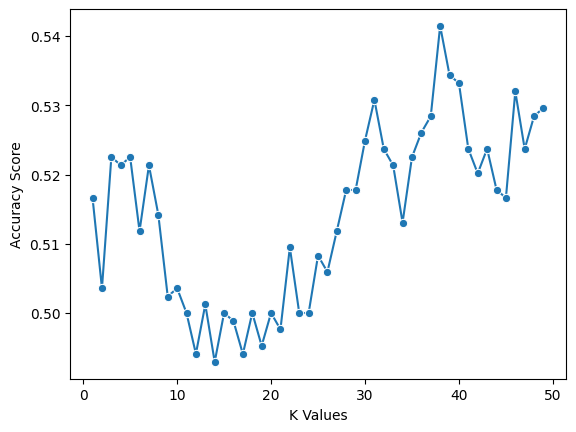

In [ ]:
k_values = [i for i in range (1,50)]
scores = []

# Scale the feature variables
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_clf, y_train_clf, cv=5)
    scores.append(np.mean(score))

# Plot the accuracy graph
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

print(f"Best k value: {k_values[np.argmax(scores)]}")


KNN Classification (High vs. Low Salary):
              precision    recall  f1-score   support

         Low       0.50      0.04      0.08       187
        High       0.48      0.95      0.64       176

    accuracy                           0.48       363
   macro avg       0.49      0.50      0.36       363
weighted avg       0.49      0.48      0.35       363

Confusion Matrix:
 [[  8 179]
 [  8 168]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


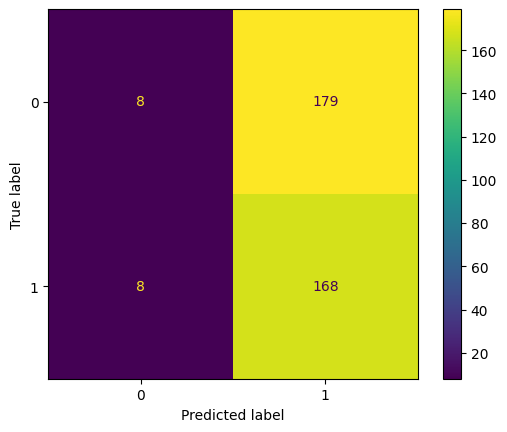

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_values[np.argmax(scores)])
knn.fit(X_train_clf, y_train_clf)

y_pred_clf = knn.predict(X_test_clf)

print("\nKNN Classification (High vs. Low Salary):")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Low','High']))
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

The accuracy for this model improved with a value of 49%, but it's still not great.

Let's try multiple models this time:

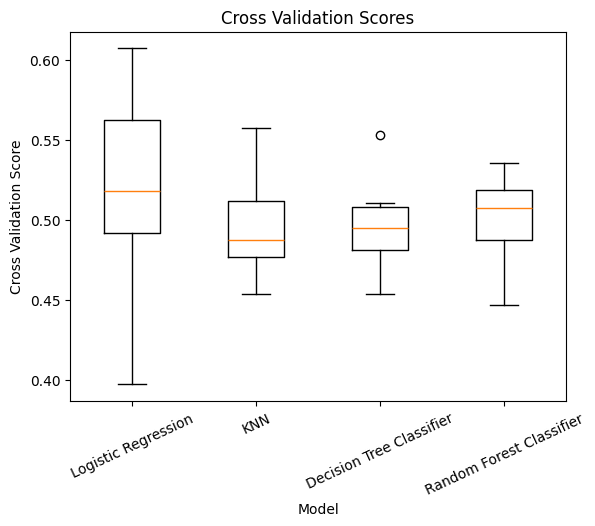

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(), "Random Forest Classifier": RandomForestClassifier()}
results = []

# Loop through the models' values
for model in models.values():

  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_clf, y_train_clf, cv=kf)
  results.append(cv_results)

plt.boxplot(results, tick_labels=models.keys())
# Modify Axis Text Ticks/Labels
plt.xticks(rotation = 25)
plt.xlabel('Model')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Scores')
plt.show()

We can see here that using a logistic regression classifier produces the best score, so let's tune a logistic regression model to find the best model:

\Logistic Regression Classification (High vs. Low Salary):
              precision    recall  f1-score   support

         Low       0.53      0.65      0.59       187
        High       0.51      0.39      0.44       176

    accuracy                           0.52       363
   macro avg       0.52      0.52      0.51       363
weighted avg       0.52      0.52      0.51       363

Confusion Matrix:
 [[  8 179]
 [  8 168]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


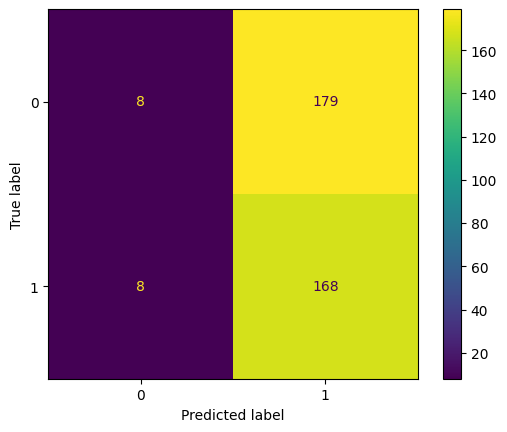

In [ ]:
# Tune Logistic Regression Model
params = {"solver": ["newton-cg", "saga", "lbfgs"],
         "C": np.linspace(0.001, 1.0, 10)}

logreg = LogisticRegression()

# Create the GridSearchCV object
tuning = GridSearchCV(logreg, param_grid=params)
tuning.fit(X_train_clf, y_train_clf)
y_pred = tuning.predict(X_test_clf)

# Compute and print performance
print("\Logistic Regression Classification (High vs. Low Salary):")
print(classification_report(y_test_clf, y_pred, target_names=['Low','High']))
cm = confusion_matrix(y_test_clf, y_pred_clf)
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

The Logistic Regression Model turned out to be the best model for predicting salary with an accuracy of 52.3%

# Conclusions

Our analysis showed us that:

*   GPA and project/internship experience do not have a linear relationship with starting salary, career satisfaction, or years to promotion (target variables)
 *   If a linear model is used to showcase these relationships, generally a lasso model is best for starting salary (the continuous target variable), otherwise logistic
 *   All linear models did not account for the variance of the target variables, so can't be recommended as a model
*   If we want to predict starting salary, a logistic model is best and can predict starting salary with an accuracy of 52%

